*This notebook provides a typical example of possible numerical experiments made possible by the package WaterWaves1D. Specifically, we integrate numerically two models for the propagation of water waves with the same initial data, and compare solutions.*

## Initialization

Import package

In [1]:
using WaterWaves1D

Define parameters of the problem

In [2]:
param = ( 
    # Physical parameters. Variables are non-dimensionalized as in Lannes, The water waves problem, isbn:978-0-8218-9470-5
    μ  = 1,     # shallow-water dimensionless parameter
    ϵ  = 1/4,   # nonlinearity dimensionless parameter
    # Numerical parameters
    N  = 2^11,  # number of collocation points
    L  = 10,    # half-length of the numerical tank (-L,L)
    T  = 5,     # final time of computation
    dt = 0.01,  # timestep
                );

Define initial data


In [3]:
z(x) = exp.(-x.^4); # surface deformation
v(x) = 0*z(x);      # zero initial velocity 
init = Init(z,v);   # generate the initial data with correct type

Set up initial-value problems for different models to compare

In [4]:
model1=WaterWaves(param,verbose=false) # The water waves system
model2=WWn(param;n=2,dealias=1,δ=1/10) # The quadratic model (WW2)
# type `?WaterWaves` or `?WWn` to see details and signification of arguments
problem1=Problem(model1, init, param, solver=RK4(model1));
problem2=Problem(model2, init, param, solver=RK4(model2));

## Computation

Solve integration in time

In [5]:
solve!(problem1);solve!(problem2);

┌ Info: Now solving the initial-value problem water waves
│ with timestep dt=0.01, final time T=5.0,
│ and N=2048 collocation points.
└ @ WaterWaves1D /home/user/WaterWaves1D.jl/src/problem.jl:123
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Now solving the initial-value problem WW2
│ with timestep dt=0.01, final time T=5.0,
│ and N=2048 collocation points.
└ @ WaterWaves1D /home/user/WaterWaves1D.jl/src/problem.jl:123
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


## Visualization

Plot solutions at final time


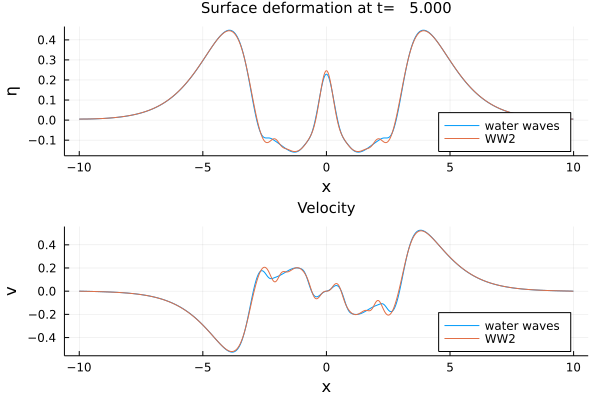

In [6]:
using Plots
plt=plot([problem1, problem2]; var = [:surface, :velocity], legend = :bottomright)
display(plt)
savefig(plt,"Example.pdf")

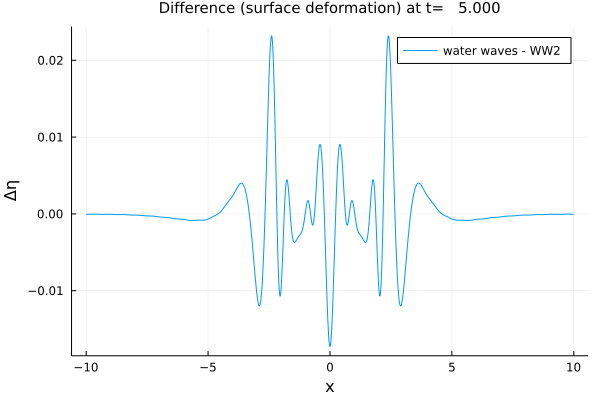

In [7]:
plot([problem1, problem2]; var = :difference)

Generate animation

┌ Info: Saved animation to 
│   fn = /home/user/WaterWaves1D.jl/notebooks/Example.gif
└ @ Plots /home/user/.julia/packages/Plots/1KWPG/src/animation.jl:114


Plots.AnimatedGif("/home/user/WaterWaves1D.jl/notebooks/Example.gif")
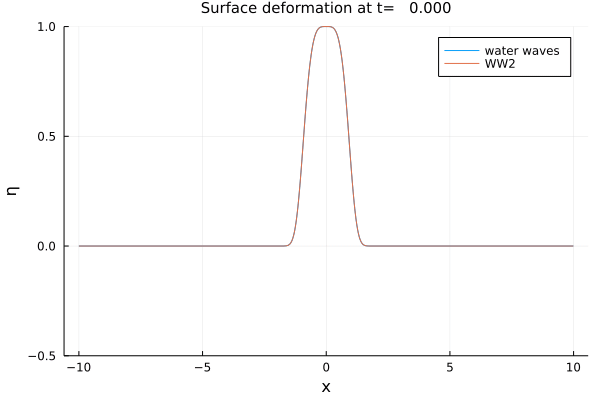

In [8]:
anim = @animate for time in LinRange(0,param.T,101)
    plot([problem1, problem2]; T = time)
    ylims!(-0.5, 1)
end
gif(anim,"Example.gif")